In [13]:
import textract
import os
import pandas as pd
import re

import nltk
from nltk import sent_tokenize
from nltk.tokenize import word_tokenize

#in case punkt package is missing decomment the line below
#nltk.download("punkt")
#nltk.download('stopwords')

## data loading && cleaning step 
#number of item inside the dataset
#use nltk for text pre-processing


fr_datadir = r"C:\Users\Cheikh\Desktop\Projet_memoire\myArmAi\samples\cv_atos\fr"

# 1- load the raw data
# 2 - Split into tokens
# 3 - Convert to lowercase
# 
#
#
#

# 1 - load data


def loadData(path):
    
    if not os.path.isdir(path):
            raise Exception("OpenFolderException","The given path is not a valid folder or folder doesn't exist")
    _dataset = []
    raw_dataset = [textract.process(os.path.join(fr_datadir,f)).decode() for f in os.listdir(fr_datadir)]
    
    print("Dataset size : {}".format(len(raw_dataset)))
    
    for d in raw_dataset:
        _dataset.append(d)
    return _dataset;


def dataSetInfo(data):
    word_count = 0;
    for _d in data:
        word_count += len(_d)
    return word_count;

dataset = loadData(datadir)

Dataset size : 11


In [18]:
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

import numpy as np
from collections import Counter 


#2
# tokenize : remove all no alphanumeric character and 
#remove stopwords
tokenizer = RegexpTokenizer(r'\w+')

def dataCleaning(raw_data):
    cleaned_data = []
    
    stop_words = set(stopwords.words("french"))
    for data in raw_data:
        cleaned_data.append([x.lower() for x in tokenizer.tokenize(data) if x not in stop_words])
    
    #transform list to numpy array and flatten it
    cleaned_data = np.hstack(cleaned_data)
    return cleaned_data;



print("Word count before cleaning : {} ".format(dataSetInfo(dataset)))
cleanedData = dataCleaning(dataset) 
print("Word count after cleaning : {} ".format(dataSetInfo(cleanedData)))

Word count before cleaning : 124650 
Word count after cleaning : 42004 


['nom' 'prénom' 'cedric' ... 'tomcat' 'pic' 'pic']


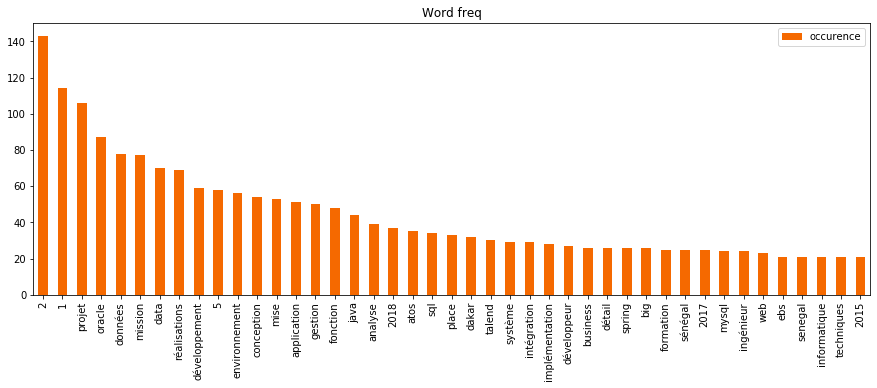

In [52]:
#word histogram
import numpy as np
import matplotlib.pyplot as plt
import json

from collections import Counter 

print(cleanedData)

#word occurence
occurence = Counter(cleanedData)

# word count frequency
occurence = {k:v for k,v in sorted(occurence.items(), key = lambda item:item[1], reverse= True)}

wfreq = nltk.FreqDist(occurence)

df = pd.DataFrame.from_dict(occurence,orient="index")
df = df.rename(columns={0:"occurence"})
df = df.loc[df["occurence"]>20]
df
df.plot(figsize=(15,5),kind='bar', color="#f56900", title='Word freq')